In [74]:
#Zadorozhny Dmitriy 3 group
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Task 1

In [75]:
data=pd.read_csv('winequality-red.csv') #at first let`s look for our dataset, and check it shape
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [76]:
data.info() #let`s check our dataset for NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


so we have not NaN values that is good

In [77]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [78]:
freq_qual=data['quality'].value_counts() 
data['quality'].value_counts(normalize=True)#here we can see, that the most frequent qualities: 5 and 6, the rarest: 3 and 8

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

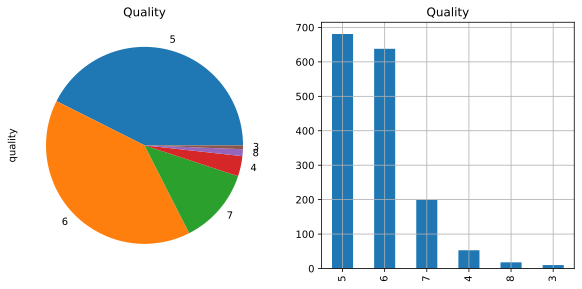

In [79]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
freq_qual.plot(kind="pie", title='Quality') #no need to specify for first axis
plt.subplot(2,2,2)
freq_qual.plot(kind="bar",title='Quality',grid=True) #we can see quality distribution on these charts

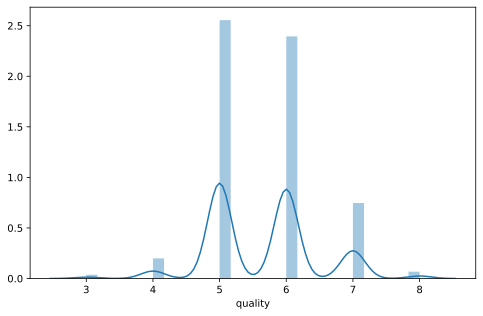

In [80]:
sns.distplot(data.quality)

In [81]:
data.groupby('quality').mean() # i think, that our target var is quality, so let`s group our dataset by quality
#so let`s see the chart of these data frame 

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

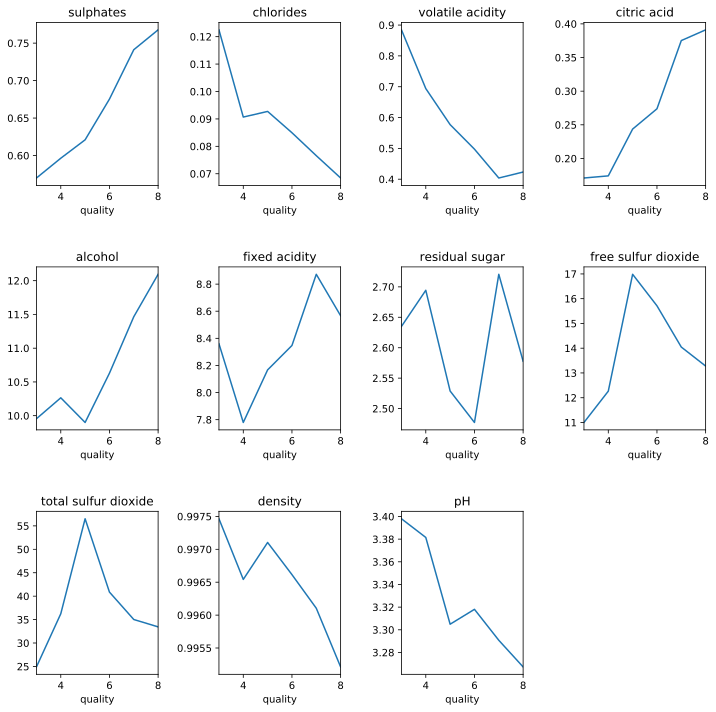

In [82]:
plt.figure(figsize=(12,12))
plt.subplot(3,4,1)
data.groupby('quality')['sulphates'].mean().plot(kind="line",title="sulphates")
plt.subplot(3,4,2)
data.groupby('quality')['chlorides'].mean().plot(kind="line",title="chlorides")
plt.subplot(3,4,3)
data.groupby('quality')['volatile acidity'].mean().plot(kind="line",title="volatile acidity")
plt.subplot(3,4,4)
data.groupby('quality')['citric acid'].mean().plot(kind="line",title="citric acid")
plt.subplot(3,4,5)
data.groupby('quality')['alcohol'].mean().plot(kind="line",title="alcohol")
plt.subplot(3,4,6)
data.groupby('quality')['fixed acidity'].mean().plot(kind="line",title="fixed acidity")
plt.subplot(3,4,7)
data.groupby('quality')['residual sugar'].mean().plot(kind="line",title="residual sugar")
plt.subplot(3,4,8)
data.groupby('quality')['free sulfur dioxide'].mean().plot(kind="line",title="free sulfur dioxide")
plt.subplot(3,4,9)
data.groupby('quality')['total sulfur dioxide'].mean().plot(kind="line",title="total sulfur dioxide")
plt.subplot(3,4,10)
data.groupby('quality')['density'].mean().plot(kind="line",title="density")
plt.subplot(3,4,11)
data.groupby('quality')['pH'].mean().plot(kind="line",title="pH")
plt.subplots_adjust(wspace=0.5, hspace=0.5)

From the graphics above we can see some addictions: 
1. higher **sulphates** -> higher **quality**.
2. less **chlorides** -> higher **quality**.
3. less **volatile acidity** -> higher **quality**.
4. higher **citric acid** -> higher **quality**.  
5. higher **alcohol** -> higher **quality** (but 4 is not affected)
6. maximum of **free sulfur dioxide** and **total sulfur dioxide** accounted for 5 **quailty**
7. less **density** -> higher **quality** (5 in not affected) 
8. less **ph** -> higher **quality** (6 is not affected)  

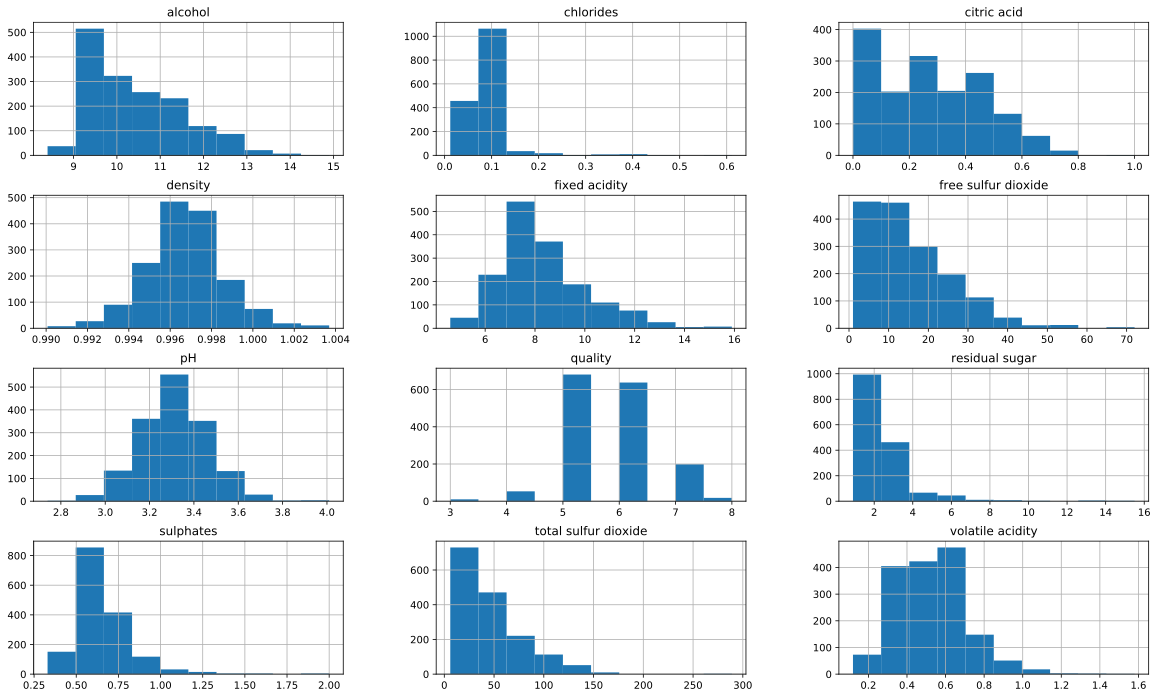

In [83]:
features = list(set(data.columns))
data[features].hist(figsize=(20,12));

In [84]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2) #i want to see correlation between signs

On this matrix we can see: (i will write only *high* (>=0.6) and *average* (>=0.3) correlations)
1. **fixed acidity**:  
*average* correlation with **citric acid**  
*high* correlation with **density**  
*high* correlation with **pH** (reverse)
2. **volatile acidity**:  
*average* corr with **citric acid** (reverse)  
3. **citric acid**:  
*average* corr with **density**  
*average* cor with **pH**   
*average* cor with **sulphates**
4. **residual sugar**:  
*average* corr with **density**  
5. **clorides**:  
*average* corr with **sulphates**  
5. **free sulfur dioxide**:  
*high* corr with **total sulfur dioxide**  
6. **density**:  
*average* corr with **alcohol**  

So what about our target var?
**quality** has some interesting correlations like:  
1. -0.39 with **volatile acidity** - Based on my charts and this value (-0.39), we can conclude that the higher **volatile acidity** value, the worse the quality of wine, and the **volatile acidity** itself depends on **citric acid** (-0.55).   Regarding **citric acid**, it weakly (0.23) affects the qualifications of our wine (i whink that 0.23 we get from correlation with **volatile acidity** (-0.55).  
2. 0.48 with **alcohol**






In [85]:
condition1=(data['quality']>4)
data.groupby(condition1).mean() # i think, that our target var is quality, so let`s group our dataset by quality

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
False         7.871429          0.724206     0.173651        2.684921   
True          8.338021          0.519766     0.274967        2.532813   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
False     0.095730            12.063492             34.444444  0.996689   
True      0.087128            16.031250             46.960938  0.996749   

               pH  sulphates    alcohol   quality  
quality                                            
False    3.384127   0.592222  10.215873  3.841270  
True     3.308118   0.660853  10.431478  5.709635

Here we see how the signs look like for conditionally low **quality**: 3,4 and for the **quality**> = 5
There are some signs which heavily poured on our main valuer - **quality**.  
I think with my data analysis it will be more easy do the true classification of vines:)
Unfortunately i did not find new signs, but i tried:)

# Task 2

In [86]:
#so var 'targets' will be my quality, and 'feature_matrix' will be my features
targets=data['quality'].values
feature_matrix=data[data.columns[:-1]].values

In [87]:
#let`s divide the sample into train and test
from sklearn.model_selection import train_test_split
train_feature_matrix, test_feature_matrix, train_targets, test_targets = train_test_split(
    feature_matrix, targets, test_size=0.2, random_state=42)

## Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
models={} #it will be a dict with all models and their accuracy

In [89]:
LogReg = LogisticRegression(C=1)
LogReg.fit(train_feature_matrix, train_targets)
y_predict = LogReg.predict(test_feature_matrix)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
print(accuracy_score(test_targets, y_predict))#so this is accuracy with the random parameters
accur=accuracy_score(test_targets, y_predict)
models['LogisticRegression']=accur

0.56875


In [92]:
from sklearn.model_selection import GridSearchCV #cross-validation

In [93]:
LogReg2 = LogisticRegression()
param_grid={'C': np.arange(1,5),'penalty':['l1','l2']}
search = GridSearchCV(LogReg2, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')
search.fit(train_feature_matrix, train_targets)
print(search.best_params_)

{'C': 4, 'penalty': 'l1'}


In [94]:
accur_cv=accuracy_score(test_targets, search.best_estimator_.predict(test_feature_matrix))#this accuracy with best param, after cv
models['LogisticRegressionCV']=accur_cv

## knn

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1, metric='euclidean') #knn with random par

In [97]:
knn.fit(train_feature_matrix, train_targets)
knn_pred=knn.predict(test_feature_matrix)
print(accuracy_score(test_targets, knn_pred)) #knn predict without cv
knn_accur=accuracy_score(test_targets, knn_pred)
models['knn']=knn_accur

0.5375


In [98]:
#with cv
knn_cv = KNeighborsClassifier()
params ={'n_neighbors':np.arange(1,11),'weights':['uniform', 'distance'], 'metric':['manhattan', 'euclidean','minkowski']}
knn_grid = GridSearchCV(knn_cv, params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(train_feature_matrix, train_targets)
print(knn_grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [99]:
knn_cv_accur=accuracy_score(test_targets, knn_grid.best_estimator_.predict(test_feature_matrix))
print(knn_cv_accur)
models['knn_cv']=knn_cv_accur

0.621875


## Decisions tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17) #tree with random param
dtree.fit(train_feature_matrix, train_targets)
dtree_pred=dtree.predict(test_feature_matrix)
print(accuracy_score(test_targets, dtree_pred)) 
models['Decision Tree']=accuracy_score(test_targets, dtree_pred)

0.546875


In [157]:
dtree_cv=DecisionTreeClassifier() #cv param
parameters={'criterion':['gini', 'entropy'],'max_depth':np.arange(3,12),'max_features':np.arange(5,11),
            'splitter':['best','random']}
dtree_grid=GridSearchCV(dtree_cv, parameters, cv=5, scoring='accuracy', n_jobs=-1)
dtree_grid.fit(train_feature_matrix, train_targets)
print(dtree_grid.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 6, 'splitter': 'best'}
0.553125


In [159]:
dtree_cv_accur=accuracy_score(test_targets, dtree_grid.best_estimator_.predict(test_feature_matrix))
print(dtree_cv_accur)
models['Decision Tree CV']=dtree_cv_accur

0.553125


## Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rfc =  RandomForestClassifier(n_estimators=100, random_state=57)#random parameters
rfc.fit(train_feature_matrix, train_targets)
rfc_pred=rfc.predict(test_feature_matrix)
print(accuracy_score(test_targets, rfc_pred))
models['Random Forest']=accuracy_score(test_targets, rfc_pred)

0.665625


In [183]:
rfc_cv= RandomForestClassifier()
par={'n_estimators':np.arange(10,100,10),'criterion':['gini','entropy'], 'max_depth':np.arange(3,15),
     'max_features':np.arange(5,11)}
rfc_grid=GridSearchCV(rfc_cv, par, cv=5, scoring='accuracy', n_jobs=-1)
rfc_grid.fit(train_feature_matrix, train_targets)
print(rfc_grid.best_params_) 

{'criterion': 'gini', 'max_depth': 14, 'max_features': 8, 'n_estimators': 60}


In [186]:
rfc_cv_accur=accuracy_score(test_targets, rfc_grid.best_estimator_.predict(test_feature_matrix))
print(rfc_cv_accur) #i did not get n_estimators too high like 100-300 in cv, because thath takes a lot of time
#i stopped on 10-90
models['Random Forest CV']=rfc_cv_accur

0.64375


## Gradient Boosting (sklearn)

In [188]:
from sklearn.ensemble import GradientBoostingClassifier

In [218]:
GBC=GradientBoostingClassifier(max_depth=9) #random param
GBC.fit(train_feature_matrix, train_targets)
GBC_pred=GBC.predict(test_feature_matrix)
print(accuracy_score(test_targets, GBC_pred))
models['Gradient Boosting(sklearn)']=accuracy_score(test_targets, GBC_pred)

0.665625


In [ ]:
#i did not use cv with GB and XGB here because it takes a lot of time, i did it on Google GPU and result for
#GB was 0.64 with estimator = 120, depth=5

## XGBOOST

In [196]:
import xgboost

In [214]:
xgb = xgboost.XGBClassifier(max_depth=9)
xgb.fit(train_feature_matrix, train_targets)
xgb_pred=xgb.predict(test_feature_matrix)
print(accuracy_score(test_targets, xgb_pred))
models['XGBOOST']=accuracy_score(test_targets, xgb_pred)

0.68125


In [219]:
models['XGBOOST']=accuracy_score(test_targets, xgb_pred)
print(models)

{'LogisticRegression': 0.56875, 'LogisticRegressionCV': 0.575, 'knn': 0.5375, 'knn_cv': 0.621875, 'Decision Tree': 0.546875, 'Decision Tree CV': 0.553125, 'Random Forest': 0.665625, 'Random Forest CV': 0.64375, 'Gradient Boosting(sklearn)': 0.665625, 'XGBOOST': 0.68125}


In [259]:
mc=pd.Series(models)
mc=mc.sort_values(ascending=False)
print(mc)
#sorted by test_targets accuracy

XGBOOST                       0.681250
Gradient Boosting(sklearn)    0.665625
Random Forest                 0.665625
Random Forest CV              0.643750
knn_cv                        0.621875
LogisticRegressionCV          0.575000
LogisticRegression            0.568750
Decision Tree CV              0.553125
Decision Tree                 0.546875
knn                           0.537500
dtype: float64


## Linear Regression

In [263]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr = LinearRegression() #without regularization
lr.fit(train_feature_matrix, train_targets)
lr_pred=lr.predict(test_feature_matrix)
print('R^2:', r2_score(test_targets, lr_pred))
print('MSE:',mean_squared_error(test_targets, lr_pred))
print('MAE:',mean_absolute_error(test_targets, lr_pred))  
mod_reg={}
mod_reg['Linear Regression']=r2_score(test_targets, lr_pred)

R^2: 0.403180341279621
MSE: 0.39002514396395555
MAE: 0.5035304415524369


In [264]:
rlr = Ridge(alpha=1)#with regularization
rlr.fit(train_feature_matrix, train_targets)
rlr_pred=rlr.predict(test_feature_matrix)
print('R^2:', r2_score(test_targets, rlr_pred))
print('MSE:',mean_squared_error(rlr_pred, test_targets))
print('MAE:',mean_absolute_error(rlr_pred, test_targets))  
mod_reg['Ridge(1)']=r2_score(test_targets, rlr_pred)

R^2: 0.3987064350775862
MSE: 0.3929488678812795
MAE: 0.5057883195080455


## knn regressor

In [106]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
p={'n_neighbors':np.arange(1,15),'weights':['uniform', 'distance'], 'metric':['manhattan', 'euclidean','minkowski'],
  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_search = GridSearchCV(knn_reg, p, cv=5, scoring='r2', n_jobs=-1)
knn_search.fit(train_feature_matrix, train_targets)
print(knn_search.best_params_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


In [265]:
print('R^2:', r2_score(test_targets,knn_search.best_estimator_.predict(test_feature_matrix)))
print('MSE:',mean_squared_error(knn_search.best_estimator_.predict(test_feature_matrix),test_targets))
print('MAE:',mean_absolute_error(knn_search.best_estimator_.predict(test_feature_matrix),test_targets))
mod_reg['knn']= r2_score(test_targets,knn_search.best_estimator_.predict(test_feature_matrix))

R^2: 0.38408853748994887
MSE: 0.4025017496065441
MAE: 0.4495702778165035


## Decisions Tree Regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
dtree_reg=DecisionTreeRegressor()
dtree_param={'criterion':['mse','mae'],'max_depth':np.arange(3,15),'max_features':np.arange(5,11),
            'splitter':['best','random'],'random_state':[25]}
dtree_reg_search=GridSearchCV(dtree_reg,dtree_param, cv=5, scoring='r2', n_jobs=-1)
dtree_reg_search.fit(train_feature_matrix, train_targets)
print(dtree_reg_search.best_params_)

{'criterion': 'mse', 'max_depth': 4, 'max_features': 5, 'random_state': 25, 'splitter': 'best'}


In [266]:
print('R^2:', r2_score(test_targets,dtree_reg_search.best_estimator_.predict(test_feature_matrix)))
print('MSE:',mean_squared_error(dtree_reg_search.best_estimator_.predict(test_feature_matrix),test_targets))
print('MAE:',mean_absolute_error(dtree_reg_search.best_estimator_.predict(test_feature_matrix),test_targets))
mod_reg['Decisions Tree']= r2_score(test_targets,dtree_reg_search.best_estimator_.predict(test_feature_matrix))

R^2: 0.34348768815988917
MSE: 0.42903464253933965
MAE: 0.5202797108422699


## Random Forest Regressor

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
rfr=RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(train_feature_matrix, train_targets)
rfr_pred=rfr.predict(test_feature_matrix)

In [267]:
print('R^2:', r2_score(test_targets, rfr_pred))
print('MSE:',mean_squared_error(test_targets, rfr_pred))
print('MAE:',mean_absolute_error(test_targets, rfr_pred))  
#i used the cv on GoogleColab and i got R^2 = 0.51, so that is lower than this value
mod_reg['Random Forest']= r2_score(test_targets, rfr_pred)

R^2: 0.5390429623873638
MSE: 0.30123812499999997
MAE: 0.4224375


## Gradient Boosting Regressor

In [220]:
from sklearn.ensemble import GradientBoostingRegressor

In [252]:
gbr=GradientBoostingRegressor(n_estimators=100, max_depth=6)
gbr.fit(train_feature_matrix, train_targets)
gbr_pred=gbr.predict(test_feature_matrix)

In [268]:
print('R^2:', r2_score(test_targets, gbr_pred))
print('MSE:',mean_squared_error(test_targets, gbr_pred))
print('MAE:',mean_absolute_error(test_targets, gbr_pred))  
mod_reg['Gradient Boosting']= r2_score(test_targets, gbr_pred)

R^2: 0.4759461581098806
MSE: 0.3424722563031729
MAE: 0.4410359288258382


In [270]:
mc1=pd.Series(mod_reg)
mc1=mc1.sort_values(ascending=False)
print(mc1)
#sorted by R^2

Random Forest        0.539043
Gradient Boosting    0.475946
Linear Regression    0.403180
Ridge(1)             0.398706
knn                  0.384089
Decisions Tree       0.343488
dtype: float64
